# Cluster analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Starting with basics with the iris data set

You can find the description here:

https://archive.ics.uci.edu/dataset/53/iris

In [18]:
from sklearn.datasets import load_iris
iris_data = load_iris()
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


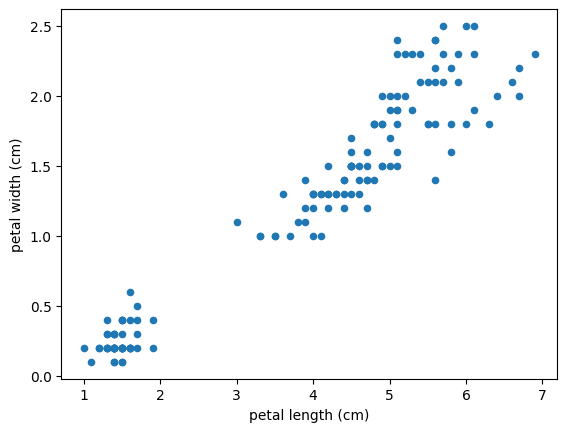

In [5]:
df_iris.plot(kind = "scatter", x="petal length (cm)", y="petal width (cm)");

## K-means

Check the documentation here:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Scaling the data - Is it necessary?

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialising the transformer
std_scaler = StandardScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_df = std_scaler.fit_transform(df_iris)

In [12]:
from sklearn.cluster import KMeans 

# Initialise the model
my_kmeans = KMeans(n_clusters= 3, #choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(scaled_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
scaled_df["cluster"] = clusters

Check the scaled dataframe with the clusters

In [13]:
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,0
148,0.527778,0.583333,0.745763,0.916667,0


### Checking the centroids distances

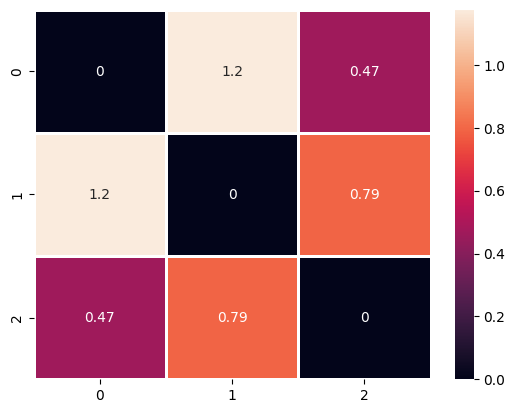

In [14]:
from sklearn.metrics import pairwise_distances

# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

# Plot distances on heatmap
sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1);

### Plotting with the centroids

petal length vs petal width

In [18]:
#getting the different clusters dataframes
species0 = scaled_df.loc[scaled_df['cluster'] == 0]
species1 = scaled_df.loc[scaled_df['cluster'] == 1]
species2 = scaled_df.loc[scaled_df['cluster'] == 2]

In [16]:
len(species0),len(species1),len(species2)

(39, 50, 61)

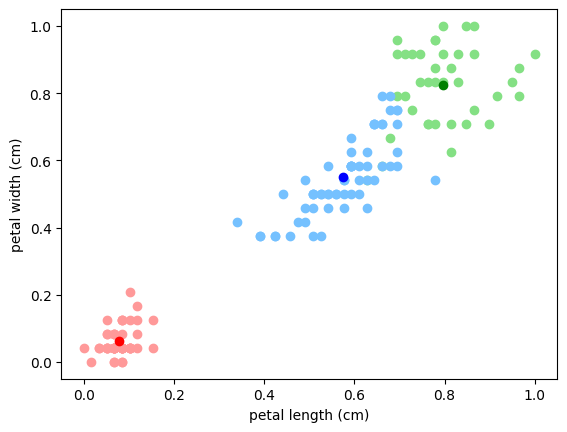

In [19]:
plt.scatter(x=species0["petal length (cm)"], y=species0["petal width (cm)"], color="#84e084")
plt.scatter(x=centroids[0][2], y=centroids[0][3], color='green')

plt.scatter(x=species1["petal length (cm)"], y=species1["petal width (cm)"], color="#ff9999")
plt.scatter(x=centroids[1][2], y=centroids[1][3], color='red')

plt.scatter(x=species2["petal length (cm)"], y=species2["petal width (cm)"], color="#75c1ff")
plt.scatter(x=centroids[2][2], y=centroids[2][3], color='blue')

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.show()

sepal length vs sepal width

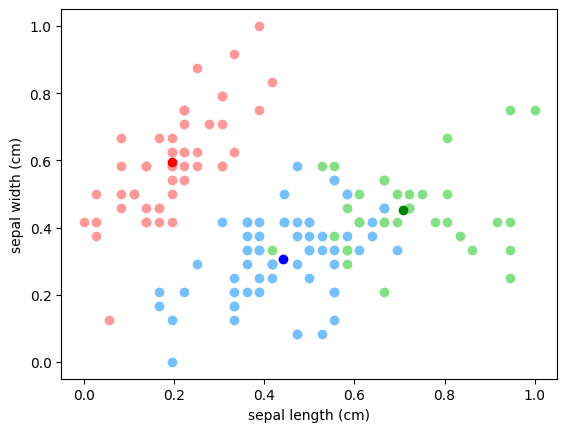

In [20]:
plt.scatter(x=species0["sepal length (cm)"], y=species0["sepal width (cm)"], color="#84e084")
plt.scatter(x=centroids[0][0], y=centroids[0][1], color='green')

plt.scatter(x=species1["sepal length (cm)"], y=species1["sepal width (cm)"], color="#ff9999")
plt.scatter(x=centroids[1][0], y=centroids[1][1], color='red')

plt.scatter(x=species2["sepal length (cm)"], y=species2["sepal width (cm)"], color="#75c1ff")
plt.scatter(x=centroids[2][0], y=centroids[2][1], color='blue')

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.show()

### Selecting number of clusters

####  Elbow method

In [21]:
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
sse = []
for k in range(2, 11):
    kmeans = KMeans(init = "random", n_clusters = k)
    kmeans.fit(df_iris)
    sse.append(kmeans.inertia_) # sum of squared distances of samples to their closest cluster center

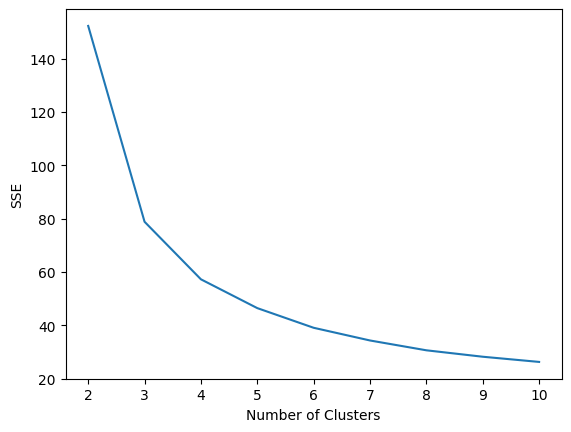

In [22]:
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Silhouette method
Check documentation:
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.6938856233529058 [0 1]
For n_clusters = 3 The average silhouette_score is : 0.6128676734836781 [0 1 2]
For n_clusters = 4 The average silhouette_score is : 0.589994418831494 [0 1 2 3]
For n_clusters = 5 The average silhouette_score is : 0.6468426070726541 [0 1 2 3 4]


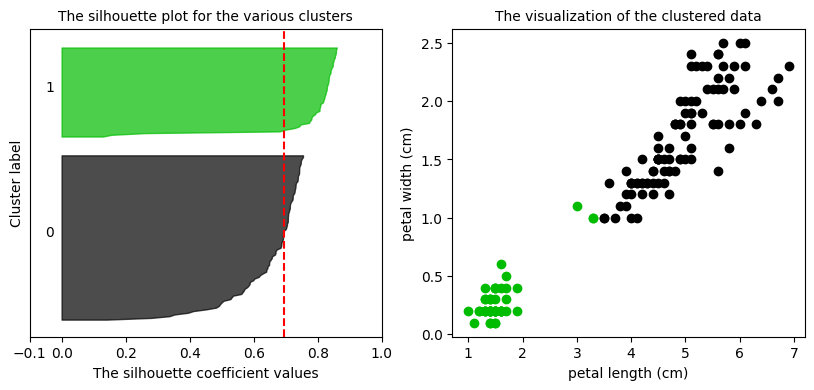

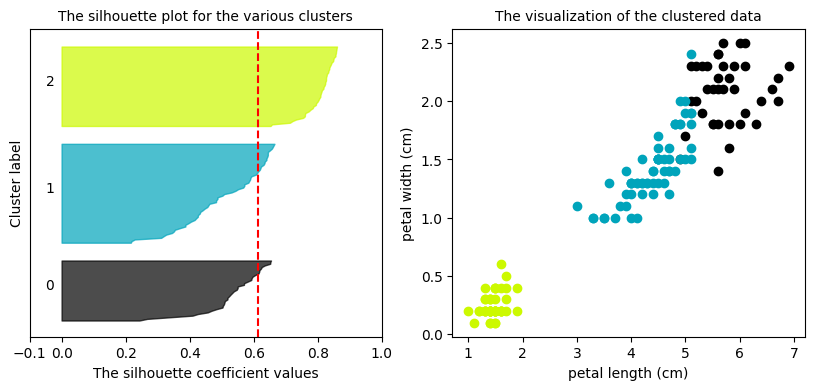

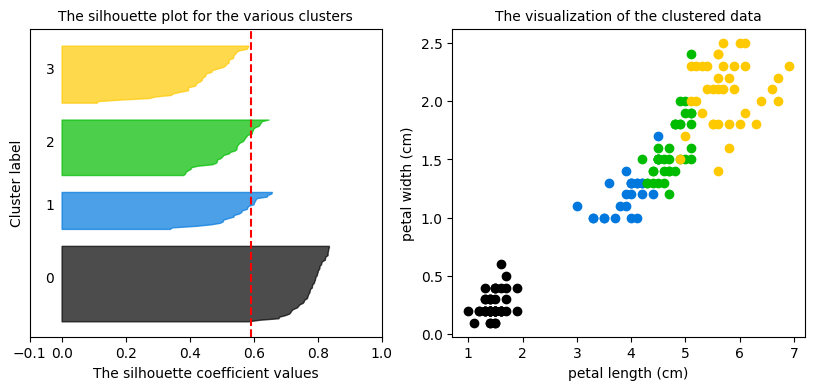

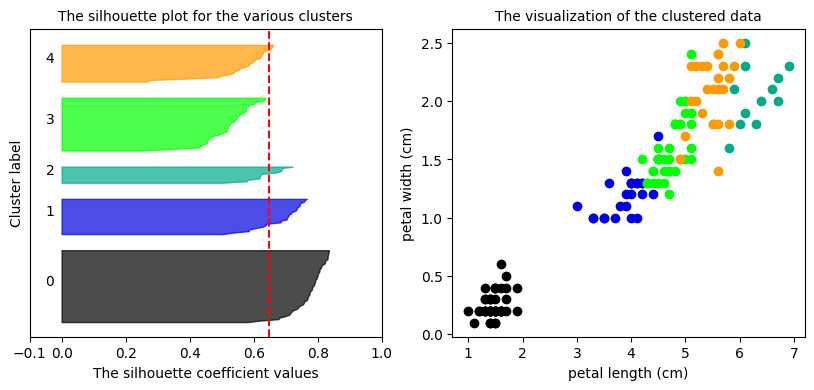

In [24]:
for k in range(2, 6):

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 4)
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10)
    kmeans = KMeans(init = "random", n_clusters = k)
    labels = kmeans.fit_predict(df_iris)
    df_iris['species'] = labels

    silhouette_avg = silhouette_score(df_iris, labels)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg, np.unique(labels))

    sample_silhouette_values = silhouette_samples(df_iris, labels)
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(df_iris) + (k + 1) * 10])

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters", fontsize=10)
    ax1.set_xlabel("The silhouette coefficient values", fontsize=10)
    ax1.set_ylabel("Cluster label", fontsize=10)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    for i in np.unique(labels):
        ax2.scatter(df_iris.loc[df_iris['species'] == i]["petal length (cm)"] , df_iris.loc[df_iris['species'] == i]["petal width (cm)"] , 
                    label = i,color = cm.nipy_spectral(float(i) / k))
    ax2.set_title("The visualization of the clustered data", fontsize=10)
    ax2.set_xlabel("petal length (cm)", fontsize=10)
    ax2.set_ylabel("petal width (cm)", fontsize=10)

plt.show()

<div style="background-color: orange; padding: 10px; border-radius: 5px;">
     <h3>Exercise</h3>
</div>

**Run a kmeans clustering with the happy data**

happy_data = pd.read_csv("data/happyscore_income.csv",sep=',')

**and with the cookies data (last session before christmas):**

## Hierarchical Agglomerative Clustering

Check the documentation:
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

### First method with scipy

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [11]:
# Loading Iris dataset
iris = load_iris()
data = iris.data  # Features: sepal length, sepal width, petal length, petal width
target = iris.target  # True labels (for comparison later)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert to DataFrame for easier handling
df = pd.DataFrame(scaled_data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


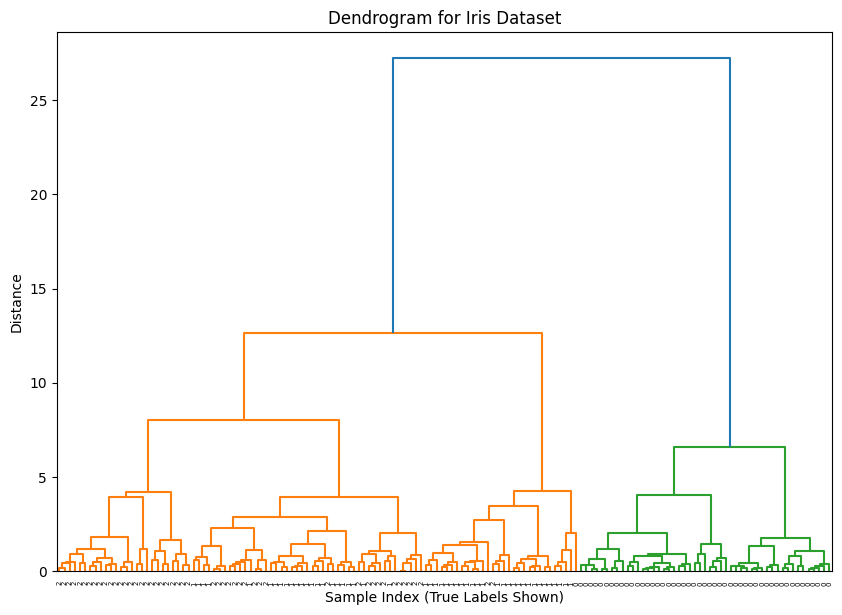

In [13]:
# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')  # Ward minimizes variance

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=target, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Iris Dataset")
plt.xlabel("Sample Index (True Labels Shown)")
plt.ylabel("Distance")
plt.show()

In [14]:
# Extract clusters
cluster_labels = fcluster(linked, t=3, criterion='maxclust')

# Add clusters to the DataFrame
df['Cluster'] = cluster_labels
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


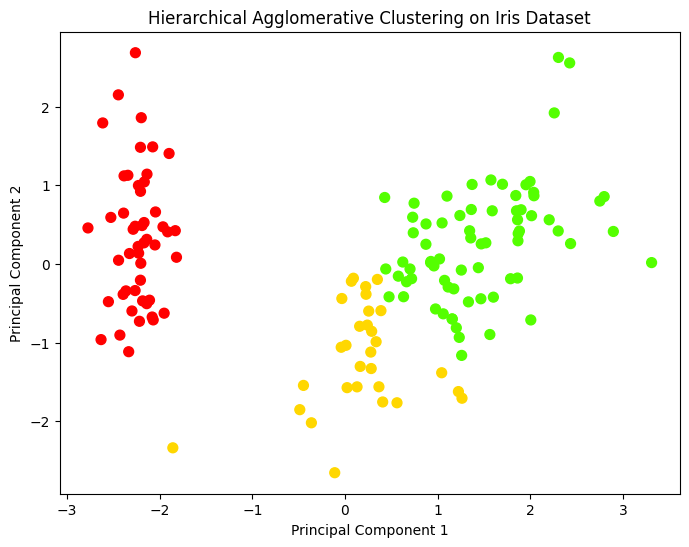

In [15]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='prism', s=50)
plt.title("Hierarchical Agglomerative Clustering on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [16]:
from sklearn.metrics import adjusted_rand_score

# Compare clusters to true labels
score = adjusted_rand_score(target, cluster_labels)
print(f"Adjusted Rand Index: {score:.2f}")

Adjusted Rand Index: 0.62


#### Cutting the tree

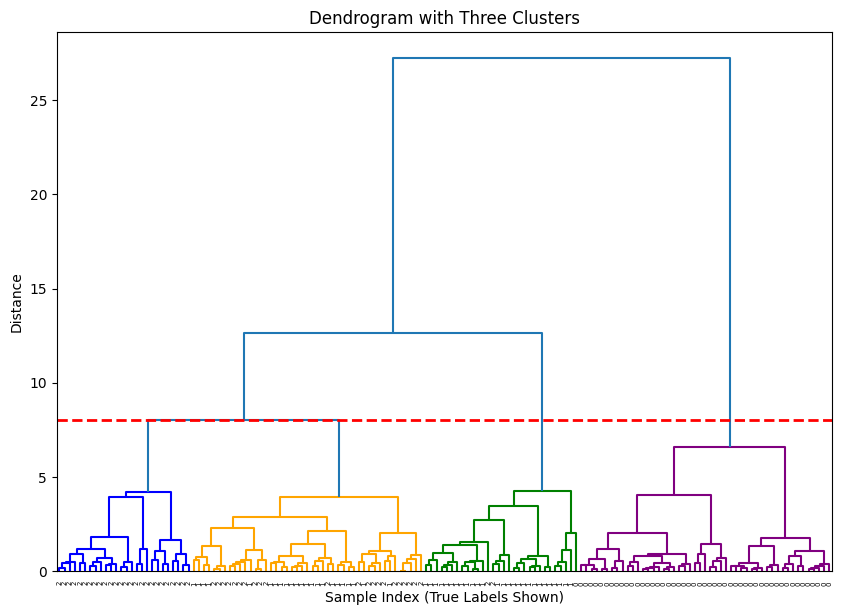

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import set_link_color_palette

# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Define colors for clusters
set_link_color_palette(['blue', 'orange', 'green', 'purple'])

# Plot the dendrogram with a cut for three clusters
plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    labels=target,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    color_threshold=linked[-3, 2]  # Cut at the height that forms x clusters
)
plt.axhline(y=linked[-3, 2], c='red', lw=2, linestyle='dashed')  # Add a horizontal cut line
plt.title("Dendrogram with Three Clusters")
plt.xlabel("Sample Index (True Labels Shown)")
plt.ylabel("Distance")
plt.show()

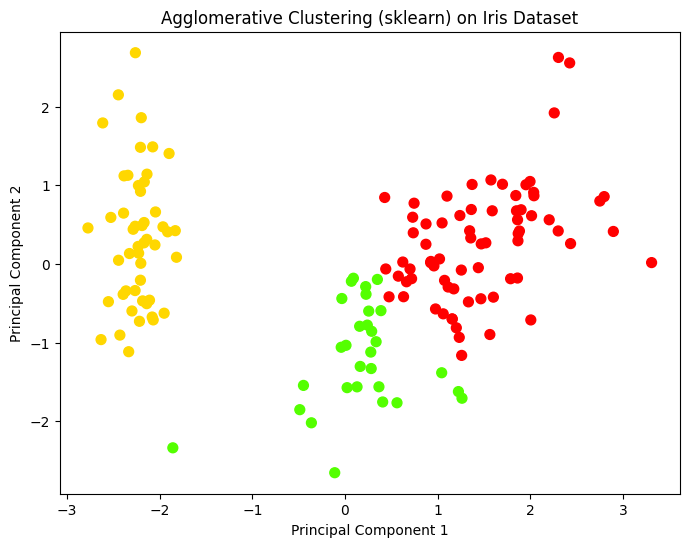

In [17]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
sklearn_labels = model.fit_predict(scaled_data)

# Visualize using PCA
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=sklearn_labels, cmap='prism', s=50)
plt.title("Agglomerative Clustering (sklearn) on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy

In [25]:
# Fit the AgglomerativeClustering model
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, compute_distances=True, linkage='ward')
model.fit(scaled_data)

AgglomerativeClustering(compute_distances=True, distance_threshold=0,
                        n_clusters=None)

In [26]:
def create_linkage_matrix(model):
    # Create a linkage matrix for the dendrogram
    n_samples = len(model.labels_)
    counts = np.zeros(model.children_.shape[0])
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Original data point
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([
        model.children_,  # Merged clusters
        model.distances_,  # Distances between clusters
        counts,  # Number of points in each cluster
    ]).astype(float)
    return linkage_matrix

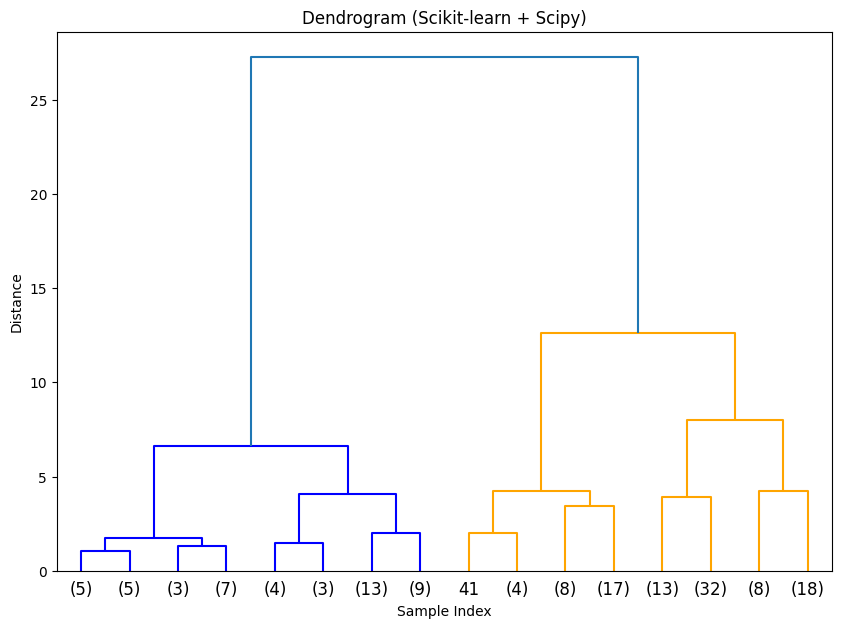

In [27]:
# Create the linkage matrix
linkage_matrix = create_linkage_matrix(model)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="level", p=3)
plt.title("Dendrogram (Scikit-learn + Scipy)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

<div style="background-color: orange; padding: 10px; border-radius: 5px;">
     <h3>Exercise</h3>
</div>

**Plot a dendrogram**

In [ ]:
df_arrests = pd.read_csv("data/usarrests.csv",sep=',')
df_arrests = df_arrests.rename(columns={"Unnamed: 0": "state"})
df_arrests.head()

## DBSCAN

In [28]:
df = pd.ExcelFile("data/airbnb_data.xlsx")

In [34]:
df = df.parse("Sheet1")

In [37]:
df["city"].unique()

array(['amsterdam', 'barcelona', 'rome', 'berlin', 'budapest', 'vienna',
       'london', 'lisbon', 'athens', 'paris'], dtype=object)

In [42]:
berlin_df = df.loc[df["city"]=="berlin",]
berlin_df = berlin_df.reset_index(drop=True)

In [67]:
locations = df[["lng", "lat"]]

In [68]:
locations

,lng,lat
0,4.90569,52.41772
1,4.90005,52.37432
2,4.97512,52.36103
3,4.89417,52.37663
4,4.90051,52.37508
...,...,...
51702,-0.05357,51.51255
51703,-0.05620,51.51823
51704,-0.22172,51.52180
51705,-0.22286,51.49715


In [69]:
import numpy as np
# Convert latitude and longitude to radians
locations_rad = np.radians(locations)

In [70]:
from sklearn.cluster import DBSCAN
#from geopy.distance import great_circle
from sklearn.metrics.pairwise import haversine_distances
# Perform DBSCAN with Haversine distances
dbscan = DBSCAN(eps=0.001, min_samples=2, metric='haversine')
labels = dbscan.fit_predict(locations_rad)

# Add cluster labels to the DataFrame
locations.loc[:, "cluster"] = labels

/var/folders/g4/g5j0vfzj07z81t33z1zh7xj00000gn/T/ipykernel_7376/86636566.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations.loc[:, "cluster"] = labels


In [71]:
locations["cluster"].unique()

array([ 0,  1,  2,  3,  4,  5, -1,  6,  7,  8,  9, 10])

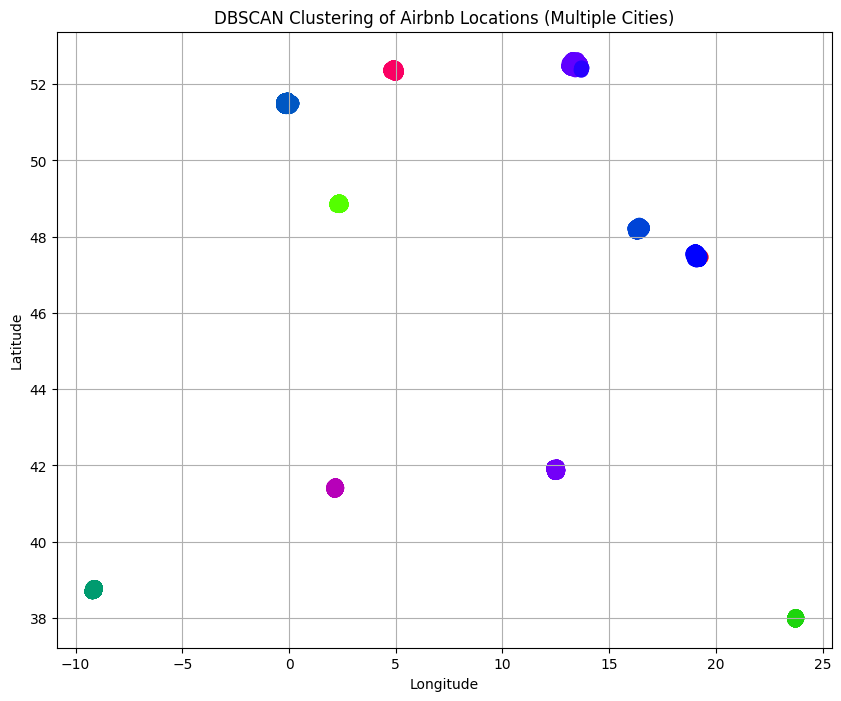

In [77]:
plt.figure(figsize=(10, 8))
plt.scatter(
    locations["lng"],
    locations["lat"],
    c=labels,
    cmap="prism",
    s=100
)
plt.title("DBSCAN Clustering of Airbnb Locations (Multiple Cities)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

In [ ]:
a = np.random.normal(3, 0.6, 300)
b = np.random.normal(1, 1, 300)
c = np.arange(0, 5,0.01)
d = np.array([n*2 for n in c])
c_with_noise = c + np.random.normal(0,0.2,c.shape)
d_with_noise = d + np.random.normal(0,0.2,d.shape)

In [ ]:
data_x = np.append(a, c_with_noise)
data_y = np.append(b, d_with_noise)

In [ ]:
df_data = pd.DataFrame({"x":data_x, "y":data_y})
df_data

In [ ]:
plt.scatter(c_with_noise, d_with_noise)
plt.scatter(a, b)
plt.show()

In [ ]:
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean',)
plt.figure(figsize =(6, 6))
plt.scatter(df_data["x"], df_data["y"], c = ac.fit_predict(df_data))
plt.show()

In [ ]:
df_data = pd.DataFrame({"x":data_x, "y":data_y})

kmeans = KMeans(init = "random", n_clusters = 2)
labels = kmeans.fit_predict(df_data)
df_data['cluster'] = labels
for i in np.unique(labels):
    plt.scatter(df_data.loc[df_data['cluster'] == i]["x"] , df_data.loc[df_data['cluster'] == i]["y"] , label = i)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
df_data = pd.DataFrame({"x":data_x, "y":data_y})

db = DBSCAN(eps=0.35, min_samples=10).fit(df_data) # eps=0.2,0.5
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)

In [ ]:
df_data['cluster'] = labels
for i in np.unique(labels):
    # if(i!=-1):
    plt.scatter(df_data.loc[df_data['cluster'] == i]["x"] , df_data.loc[df_data['cluster'] == i]["y"] , label = i)
plt.show()

-1 is for noisy samples

In [ ]:
from sklearn.decomposition import PCA
from pca import pca

from sklearn.preprocessing import StandardScaler

In [ ]:
df_arrests = pd.read_csv("data/usarrests.csv",sep=',')
df_arrests = df_arrests.rename(columns={"Unnamed: 0": "state"})
df_arrests.head()

In [ ]:
df_arrests_num = df_arrests.iloc[:, 1:]
labels = df_arrests_num.columns

scaler = StandardScaler()
df_arrests_num_stand=scaler.fit_transform(df_arrests_num)
df_arrests_num_stand = pd.DataFrame(data=df_arrests_num_stand, columns = labels)

In [ ]:
pcamodel = PCA(n_components=2)
df_reduced_pca = pcamodel.fit_transform(df_arrests_num_stand)

In [ ]:
df_result = pd.DataFrame(df_reduced_pca)
df_result.columns = ['P1', 'P2']

In [ ]:
plt.figure(figsize =(15, 6))
plt.title('Dendrogram of Arrests data')
shc.dendrogram((shc.linkage(df_result, method ='ward')),truncate_mode="level", labels=list(df_arrests.state))
plt.show()

In [ ]:
ac = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean',)
plt.figure(figsize =(5, 5))
plt.scatter(df_result["P1"], df_result["P2"], c = ac.fit_predict(df_result))
plt.show()